# Lightning Network (LN) - Exploratory data analysis and cleansing

## Loading libraries and mounting drive

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import time
import boto3
from IPython.display import display, Markdown, Latex


import os
import re
import sys
import io

## Loading data

In [3]:

''' #Uncomment for local read
cnx = sqlite3.connect('/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/MIMS_capstone/Data/LN_channels.db')
df = pd.read_sql_query("SELECT * FROM channels", cnx)
df.to_csv(r'/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/MIMS_capstone/Data/LN_channels.csv')
'''

# Load Data

# Initiate s3 resource

session = boto3.session.Session()
s3 = session.resource('s3')
bucket='ln-strategy-data'
extraction_id=1585344554



# Dataframe

decisions_load = s3.Object(bucket_name=bucket, key='LN_channels.csv').get()
df=pd.read_csv(io.BytesIO(decisions_load['Body'].read()))

In [11]:
df.head()

,short_channel_id,open_block,open_transaction,address,close_block,close_transaction,node0,node1,satoshis,last_seen,...,close_time,close_fee,last_update,close_type,close_htlc_count,close_balance_a,close_balance_b,dec_id,node0_id,node1_id
0,505149x622x0,505149,f6bc767df9148ebf76d2b9baf4eb46e3230712c2bf5a51...,bc1qjmg6ev344fenh3zhg0yjl6hyvxpxluw6x9nn2a5lv4...,592638.0,82cb2ea2a06c8c453d8b9ca08e17bbefe87225aa380b2d...,0250373555232cec757ea141273e75381c84cc3ab22f1e...,02ef61a252f9504a42fc264a28476f44cea0711a44b2da...,300000,2019-08-22 02:49:00,...,1.567276e+09,184.0,1.563172e+09,mutual,0.0,3570.0,296246.0,0,3098,1492
1,513675x2245x0,513675,4297b5fe9beeb701c67fd0f84861b22edbcafe5c25be67...,bc1qymmdt0vzhdjqyqw2cevrqppp6rrlg5j2l20yk72z6y...,594718.0,3f86d9427c750f37a963b5a329da8941520f5a6cdbfe02...,028aa5a991a2acf33da91674fe062219b640e5e57d77a4...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,50000,2019-10-07 02:42:58,...,1.568401e+09,4410.0,1.552879e+09,unused,0.0,45590.0,0.0,1,5474,7365
2,513887x1177x0,513887,3b4cc434e62c1739e79171c7c1641bf9ac0e32d8530c68...,bc1q48l3h7sfdjaqat3sy98naltkwlujwefwnkfqxfm8fd...,NaN,NaN,02d97e94cfeedca2a3da47acb400bc6836e671b3cb3fc0...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,50000,2020-02-14 03:15:22,...,NaN,NaN,1.581536e+09,NaN,NaN,NaN,NaN,2,2797,7365
3,513909x1248x0,513909,86311514680351b1e644276efd7704ba13be169cc1a272...,bc1q24kvd9wdjdhwgr54fmu7cu9xldmsjuwdsq2ph5fwnj...,NaN,NaN,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,20000,2020-02-14 03:15:26,...,NaN,NaN,1.581464e+09,NaN,NaN,NaN,NaN,3,211,7365
4,513910x1814x1,513910,7f010765ce336d2be78c846844544e6a06ce2c59e7785f...,bc1qzh9xrpqvyse7fuanc8tl5e75qymq5fzk3deh78hs02...,NaN,NaN,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,20000,2020-02-14 03:15:26,...,NaN,NaN,1.581466e+09,NaN,NaN,NaN,NaN,4,211,7365


In [4]:
df.describe()

,open_block,close_block,satoshis,open_time,open_fee,close_time,close_fee,last_update,close_htlc_count,close_balance_a,close_balance_b
count,72476.000000,38355.000000,7.247600e+04,7.247600e+04,72476.000000,3.835500e+04,38355.000000,5.552000e+04,36822.000000,3.682200e+04,3.682200e+04
mean,579183.075335,595606.637622,2.668396e+06,1.559505e+09,5514.790703,1.569033e+09,6479.540712,1.577627e+09,0.030199,1.554857e+06,6.759577e+05
std,21053.963141,11761.861535,5.473030e+06,1.226237e+07,10789.996329,6.794199e+06,7392.241919,5.578798e+06,0.389022,3.312313e+06,2.720192e+06
min,505149.000000,535029.000000,1.050000e+03,1.516441e+09,122.000000,1.533314e+09,36.000000,1.524248e+09,0.000000,0.000000e+00,0.000000e+00
25%,565486.500000,585438.000000,1.500000e+05,1.551621e+09,458.000000,1.563151e+09,1760.000000,1.574088e+09,0.000000,5.300775e+04,0.000000e+00
50%,575981.000000,594220.000000,5.778270e+05,1.557823e+09,2652.000000,1.568142e+09,3647.000000,1.581101e+09,0.000000,2.356620e+05,0.000000e+00
75%,595671.250000,605251.500000,2.600000e+06,1.568933e+09,6260.000000,1.574627e+09,9102.500000,1.581447e+09,0.000000,9.978100e+05,5.559375e+04
max,617297.000000,617298.000000,2.684355e+08,1.581648e+09,663000.000000,1.581649e+09,201395.000000,1.581650e+09,51.000000,1.309727e+08,1.669281e+08


## General descriptive data

In [4]:
# Range covered by Data

# Calculate block range
start_block=min(df['open_block'])
end_block=max(df['close_block'])

# Calculate date range
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(min(df['open_time'])))
end_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(max([max(df['close_time']),max(df['open_time'])])))


print('Data from beggining of LN creation  {} (block: {}) to {} (block: {})'.format(start_time,start_block,end_time,int(end_block)))


Data from beggining of LN creation  2018-01-20 09:43:37 (block: 505149) to 2020-02-14 03:00:19 (block: 617298)


In [4]:
# TODO: Add Eva's general descriptive analysis here

## Block-per-Block network activity

In [5]:
# Blocks with activity

open_blocks=set(df['open_block'])
close_blocks=set(np.nan_to_num(df['close_block'].to_numpy()))
active_blocks=open_blocks.union(close_blocks)

print('Total blocks that have been mined in the analysis period: {}'.format(int(end_block)-start_block))
print('Number of blocks where channels have been opened: {}'.format(len(open_blocks)))
print('Number of blocks where channels have been closed: {}'.format(len(close_blocks)))
print('Total blocks with activity (opening or closing of channels): {}'.format(len(active_blocks)))



Total blocks that have been mined in the analysis period: 112149
Number of blocks where channels have been opened: 30543
Number of blocks where channels have been closed: 11024
Total blocks with activity (opening or closing of channels): 36544


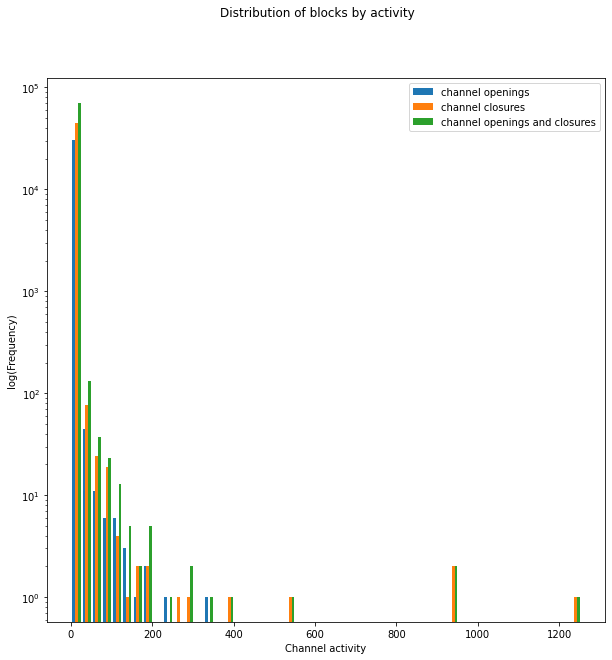

In [6]:
# Distribution of Block activity
ob_values, ob_counts = np.unique(np.array(list(df['open_block'])), return_counts=True)
cb_values, cb_counts = np.unique(np.array(list(df['close_block'])), return_counts=True)
ab_values, ab_counts = np.unique(np.array(list(df['open_block'])+list(df['close_block'])), return_counts=True)


fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Distribution of blocks by activity')
plt.yscale('log', nonposy='clip')
plt.xlabel('Channel activity')
plt.ylabel('log(Frequency)')
_=plt.hist([ob_counts,cb_counts,ab_counts],bins=50,label=['channel openings','channel closures','channel openings and closures'])
plt.legend(loc='upper right')

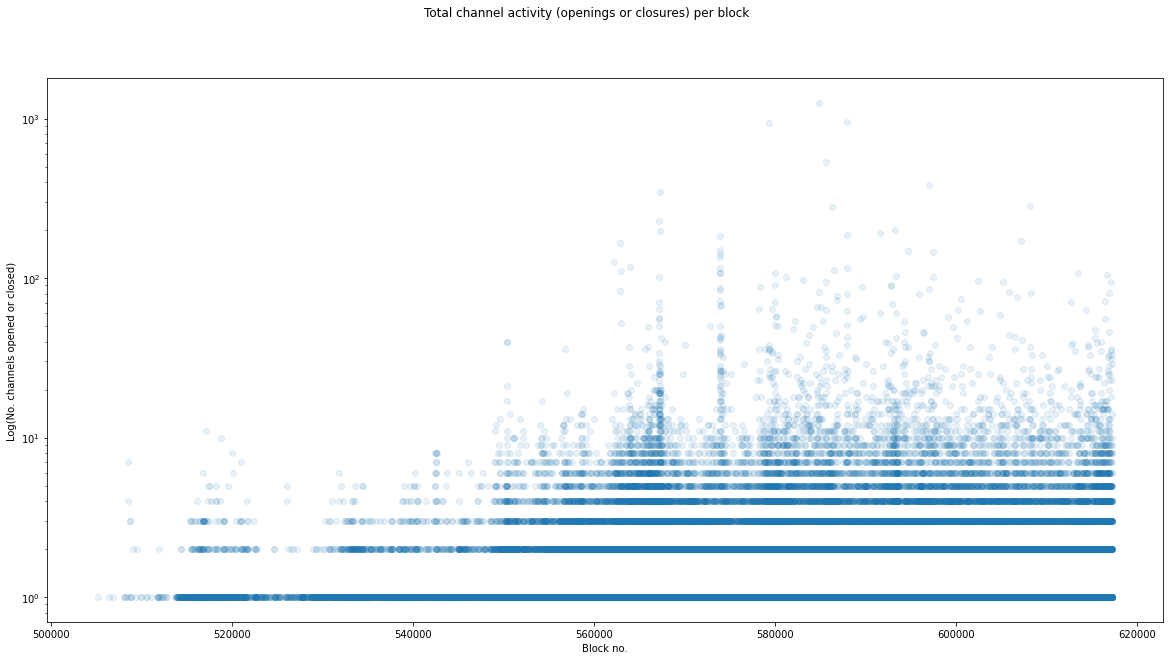

In [8]:
# Number of link opening or closings per block (log scale)
fig,ax=plt.subplots(figsize=(20,10))
fig.suptitle('Total channel activity (openings or closures) per block')
plt.yscale('log', nonposy='clip')
plt.xlabel('Block no.')
plt.ylabel('Log(No. channels opened or closed)')
_=plt.scatter(ab_values,ab_counts,alpha=0.1)

In [15]:
print(np.array(ab_counts).std())
print(np.array(ab_counts).mean())
print(np.array(ab_counts).max())

8.703042835268864
2.0512849541492133
1253


In [17]:
# TODO: Check if and why are channel ids repeated
no_rows=len(df)
no_channels=df['short_channel_id'].nunique()

print('Number of rows: {}'.format(no_rows))
print('Number of different channel ids: {}'.format(no_channels))
if no_rows==no_channels:
    display(Markdown('There are **NO** repeated ids'))
    
elif no_channels<no_rows:
    display(Markdown('There are repeated ids'))


Number of rows: 72476
Number of different channel ids: 72476


There are **NO** repeated ids

In [ ]:
# TODO: Net capacity change per block

In [ ]:
# TODO: Nodes making changes per block

In [ ]:
# TODO: Opening and Closing fees (and averages) per block

In [ ]:
# TODO: Analysis of outliers (Blocks with activity > 200)

## Redundancy (PEND) 

In [ ]:
#----MIGHT NOT BE NECESSARY----
# The df_open needs to be defined and or the analysis for redundancy on every snapshot. (How to deal with redundancy)
# Redundant one way channels
edges_zip_1=zip(df_open['node0'],df_open['node1'])
edge_prod=[a+b for a,b in edges_zip_1]

values, counts = np.unique(edge_prod, return_counts=True)

#plt.hist(counts,bins=[0, 1, 2, 3, 4, 5, 6,7,8,9,10])

edges_redun=counts[np.where(counts>1)]

print(len(edges_redun))
plt.yscale('log', nonposy='clip')
_=plt.hist(edges_redun,bins=max(counts))

In [ ]:
# Redundant bi-directional channels

# Hashing node id's and multiply them together to have the same channel representation in both directions 
edge_hash_0=np.array([hash(a) for a in df_open['node0']])
edge_hash_1=np.array([hash(a) for a in df_open['node1']])
edge_hash=np.multiply(edge_hash_0,edge_hash_1) # There is overflow in this multiplication but it doesn't matter for the purpose of comparisson

# Count
values, counts = np.unique(edge_hash, return_counts=True)
edges_redun_h=counts[np.where(counts>1)]
print(len(edges_redun_h))